About Dataset
Data Description
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Domain
Cement manufacturing

Context
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Attribute Information
Cement : measured in kg in a m3 mixture
Blast : measured in kg in a m3 mixture
Fly ash : measured in kg in a m3 mixture
Water : measured in kg in a m3 mixture
Superplasticizer : measured in kg in a m3 mixture
Coarse Aggregate : measured in kg in a m3 mixture
Fine Aggregate : measured in kg in a m3 mixture
Age : day (1~365)
Concrete compressive strength measured in MPa

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # data visualization library
from sklearn.preprocessing import PowerTransformer  # Importar PowerTransformer
from sklearn.preprocessing import Normalizer # Normalizer se utilizará para normalizar los datos
from sklearn.preprocessing import MinMaxScaler # Minmax_scale se utilizará para normalizar los datos

In [12]:
data = pd.read_csv("concrete.csv")
print(data.shape)
data

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


Como se puede observar, se cuenta con un total de 1030 filas cada uno con 9 columnas, antes de iniciar con un proceso mas profundo como machine learning, se procede primero a limpiar los datos.
Se observa que todos los datos son numericos, sin embargo se evaluará por posibles datos object que se hayan colado.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


Todos los datos son numericos, ademas se observa que todas las columnas tienen la misma cantidad de filas.

Limpieza

1) Datos faltantes en celdas (no ocurre, pues todas las categorías tienen la misma cantidad de filas)
2) Columnas irrelevantes (Se debe analizar con mucho cuidado)
3) Filas repetidas en los registros
4) Valores extremos o valores nulos
5) Errores tipograficos (para caracteristicas tipo object)

In [6]:
# 1) Datos Faltantes

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


2) Datos irrelevantes, para este apartado es importante tener mucho cuidado ya que podemos eliminar columnas que son relevantes para el machine learning, por esta razón y porque mas adelante tendré un aparatado de Feature selection, no eliminaré los datos que considero irrelevantes (que no los hay, todos son relevantes)

Feature selection es un proceso fundamental en data science y aprendizaje automático que tiene como objetivo identificar y seleccionar las variables más relevantes para un modelo predictivo. Este proceso busca reducir la dimensionalidad de los datos, eliminando características redundantes o irrelevantes, lo que no solo mejora la precisión del modelo, sino también su eficiencia al reducir el tiempo de entrenamiento y el riesgo de sobreajuste. Existen diversos métodos para llevar a cabo la selección de características, como métodos basados en filtros, envolventes o embebidos, cada uno con sus propias ventajas dependiendo del tipo de datos y el algoritmo utilizado. En definitiva, la correcta selección de características permite construir modelos más robustos, interpretables y rápidos.

Sin embargo, se procede a observar si hay columnas con un unico valor,o columnas repetidas que puedan generar ruido

In [7]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Con esta estadistica basica podemos generarnos varias ideas 
1) no hay columnas que tienen un unico valor, pues std es diferente de cero

2)  se observa una diferencia considerable entre la media y el valor máximo en columnas como por ejemplo ash, slag etc. Esto podría indicar que algunos registros son valores atípicos extremos o que la distribución de los datos está sesgada a la izquierda (distribución negativamente sesgada). En una distribución sesgada a la izquierda, los valores más bajos son relativamente más frecuentes, mientras que los valores más altos son menos comunes y se distribuyen de manera dispersa. Este fenómeno puede afectar la media, que tenderá a estar más cerca de los valores más bajos.

3) Un análisis de la desviación estándar en relación con la media proporciona información valiosa sobre la dispersión de los datos. Si la desviación estándar es pequeña en relación con la media, los datos estarán muy concentrados alrededor de la media, lo que indica una distribución estrecha con un pico alto en la curva gaussiana. Este tipo de distribución sugiere que los datos tienen baja variabilidad y son bastante consistentes.
Por otro lado, si la desviación estándar es grande en comparación con la media, los datos estarán mucho más dispersos, lo que se traduce en una curva más ancha y con un pico más bajo. Esta dispersión podría indicar una gran variabilidad entre los registros, lo que a su vez podría reflejar incertidumbre o diversidad en los datos, lo cual es importante a la hora de elegir los métodos adecuados para el modelado

4) Observamos que hay un valor maximo de 80 MPa para concreto, si bien es posible que esto ocurra, puede tratarse de un dato atipico, ya que no es comun y re quiere tecnicas avanzadas para lograrlo

5) se observa que en la columna cemento, el valor minimo es diferente de cero, es bueno, si existiera un valor de 0 sería un error y tendriamos que analizar esa fila o filas, esto es igual para la columna de agua y agregados.

In [8]:
# 3) Filas repetidas en los registros
print(f"Tamaño del dataset antes de eliminar duplicados: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Tamaño del dataset después de eliminar duplicados: {data.shape}")

Tamaño del dataset antes de eliminar duplicados: (1030, 9)
Tamaño del dataset después de eliminar duplicados: (1005, 9)


se observa que existian 25 filas repetidas, estas fueron eliminadas de lo contrario cargariamos ruido para nuestro algoritmo de machine learning.

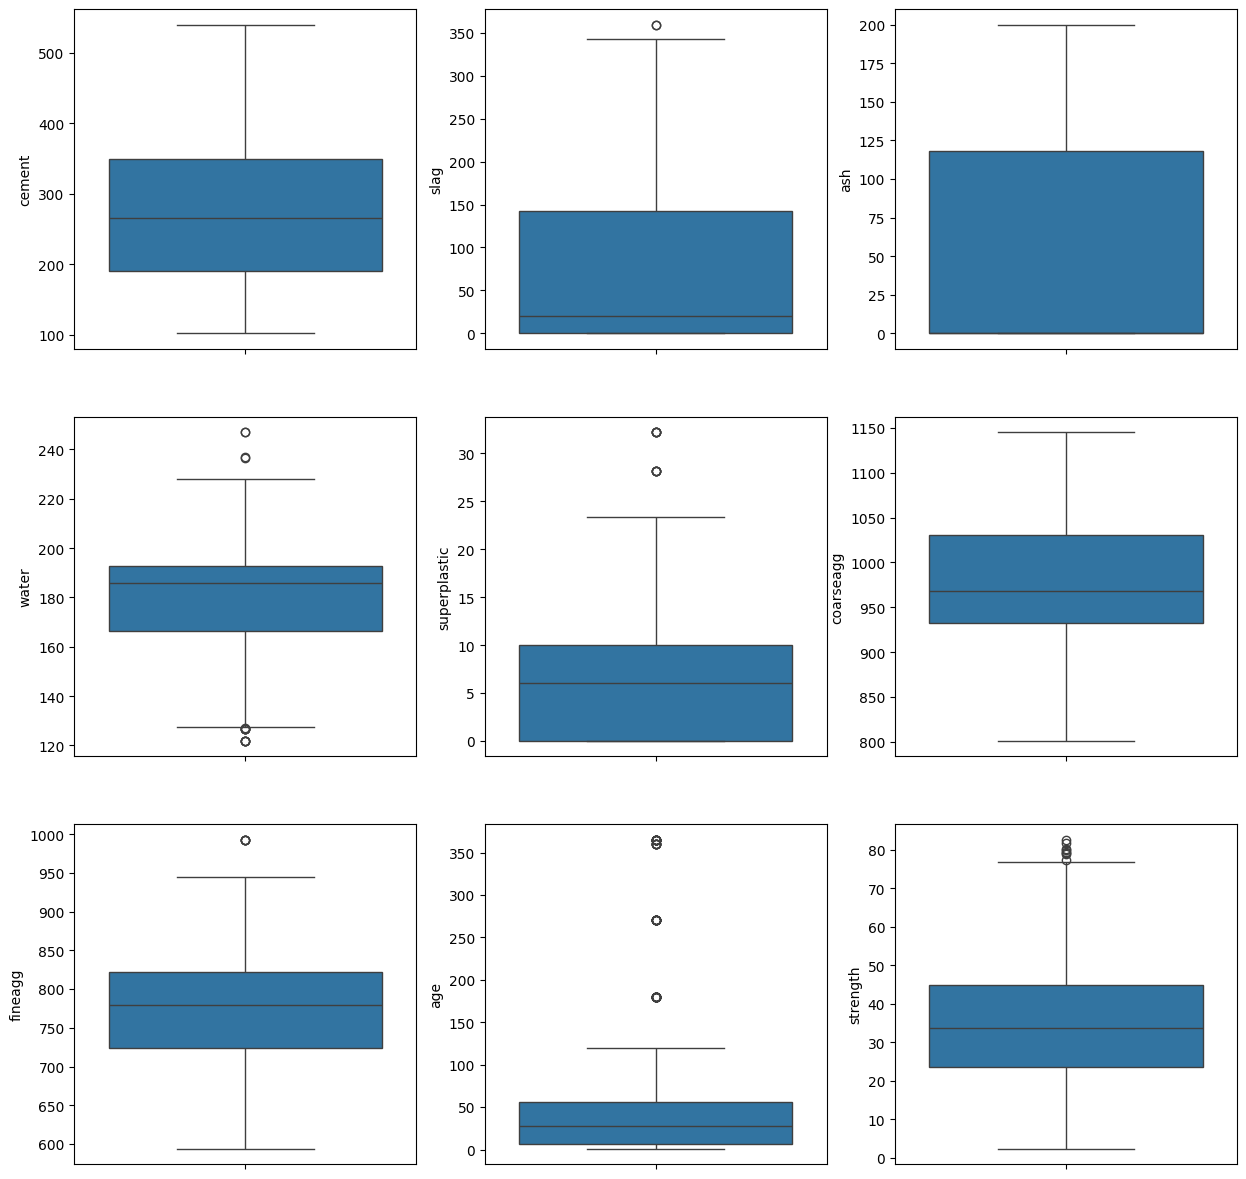

In [9]:
# 4) Valores extremos o valores nulos

f, axes = plt.subplots(3, 3, figsize=(15, 15) , sharex=False, sharey=False) #se creará un gráfico de 3x3
sns.boxplot(data['cement'], ax=axes[0, 0])
sns.boxplot(data['slag'], ax=axes[0, 1])
sns.boxplot(data['ash'], ax=axes[0, 2])
sns.boxplot(data['water'], ax=axes[1, 0])
sns.boxplot(data['superplastic'], ax=axes[1, 1])
sns.boxplot(data['coarseagg'], ax=axes[1, 2])
sns.boxplot(data['fineagg'], ax=axes[2, 0])
sns.boxplot(data['age'], ax=axes[2, 1])
sns.boxplot(data['strength'], ax=axes[2, 2])

plt.show()

Al evaluar los valores proporcionados para una mezcla de concreto, se observa que los datos se encuentran dentro de rangos típicos utilizados en la industria. 

5) Errores tipograficos (para caracteristicas tipo object) 
no presenta, ya que el problema es de tipo regresión y no presente caracteristicas tipo object 

C:\Users\ardil\AppData\Local\Temp\ipykernel_1284\1836714455.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cement'], ax=axes[0, 0])
C:\Users\ardil\AppData\Local\Temp\ipykernel_1284\1836714455.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['slag'], ax=axes[0, 1])
C:\Users\ard

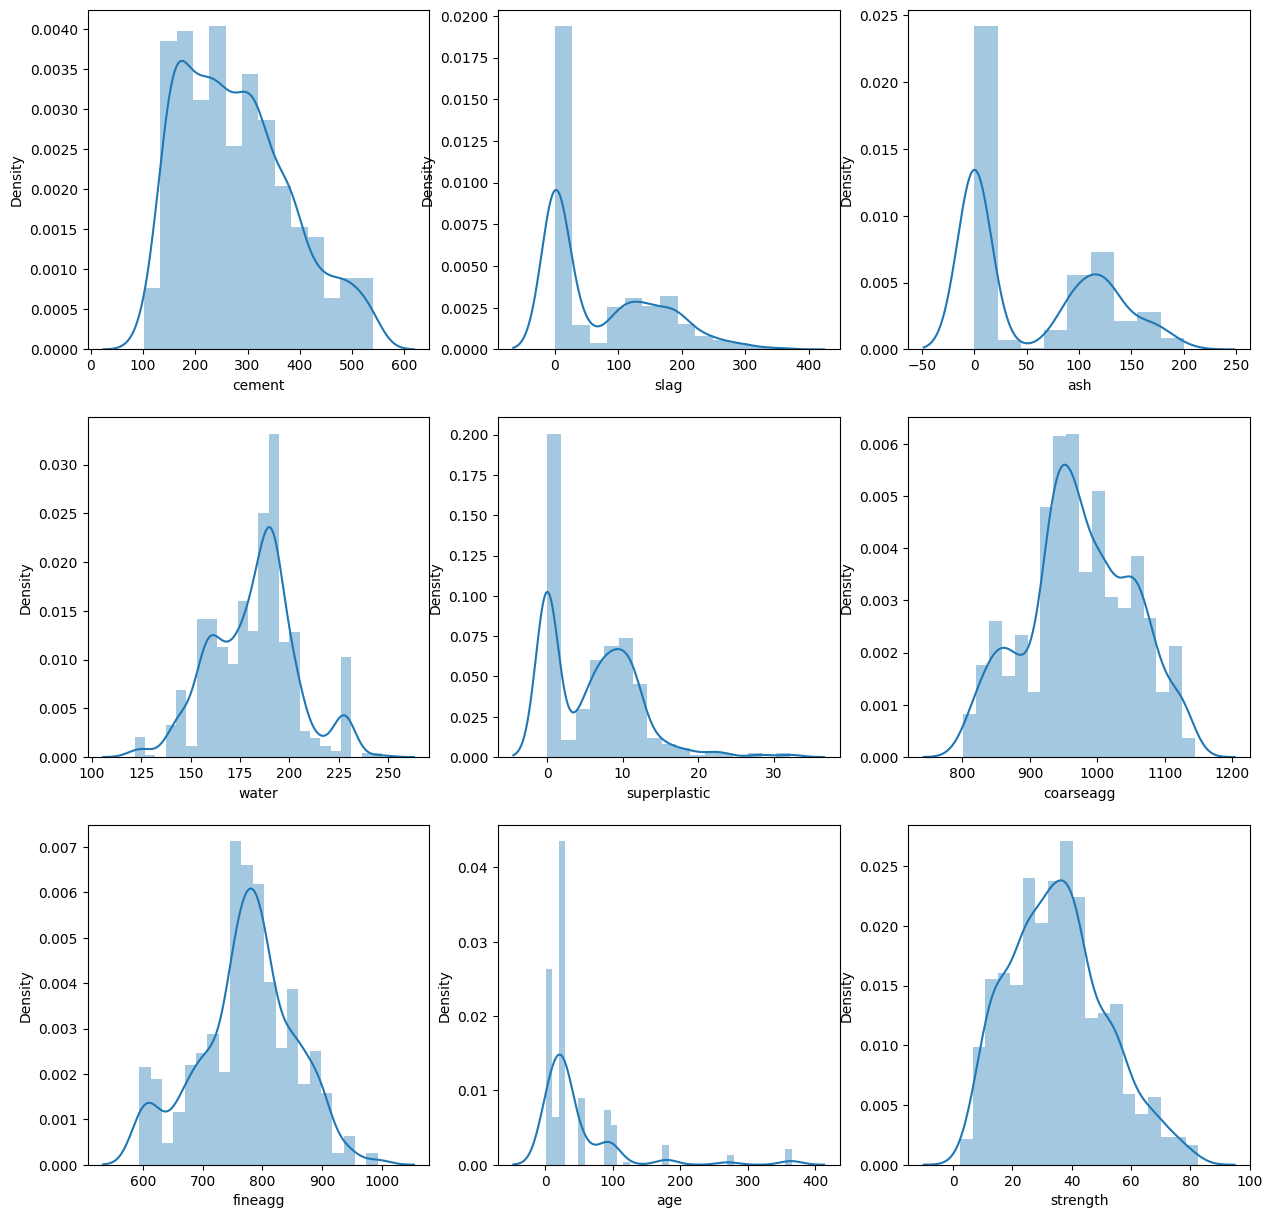

In [10]:
f, axes = plt.subplots(3, 3, figsize=(15, 15) , sharex=False, sharey=False) #se creará un gráfico de 3x3
sns.distplot(data['cement'], ax=axes[0, 0])
sns.distplot(data['slag'], ax=axes[0, 1])
sns.distplot(data['ash'], ax=axes[0, 2])
sns.distplot(data['water'], ax=axes[1, 0])
sns.distplot(data['superplastic'], ax=axes[1, 1])
sns.distplot(data['coarseagg'], ax=axes[1, 2])
sns.distplot(data['fineagg'], ax=axes[2, 0])
sns.distplot(data['age'], ax=axes[2, 1])
sns.distplot(data['strength'], ax=axes[2, 2])

plt.show()

Se puede observar que de todas las caracteristicas, la edad presenta un variable natural creciente, tenia pensado convertir estos valores a unicos, sin embargo el algoritmo de machine leraning puede considerar que existe la misma distancia entre valores lo cual no es cierto y perdería la naturaleza del proceso.


Teniendo esto claro, se procede a usar el algoritmo minmaxscale, para escalar los datos de 0 a 1, con el fin de que no sea tan tedioso para el algoritmo de machine learning.

C:\Users\ardil\AppData\Local\Temp\ipykernel_1284\1336717635.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['cement'], ax=axes[0, 0])
C:\Users\ardil\AppData\Local\Temp\ipykernel_1284\1336717635.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['slag'], ax=axes[0, 1])
C:\Users

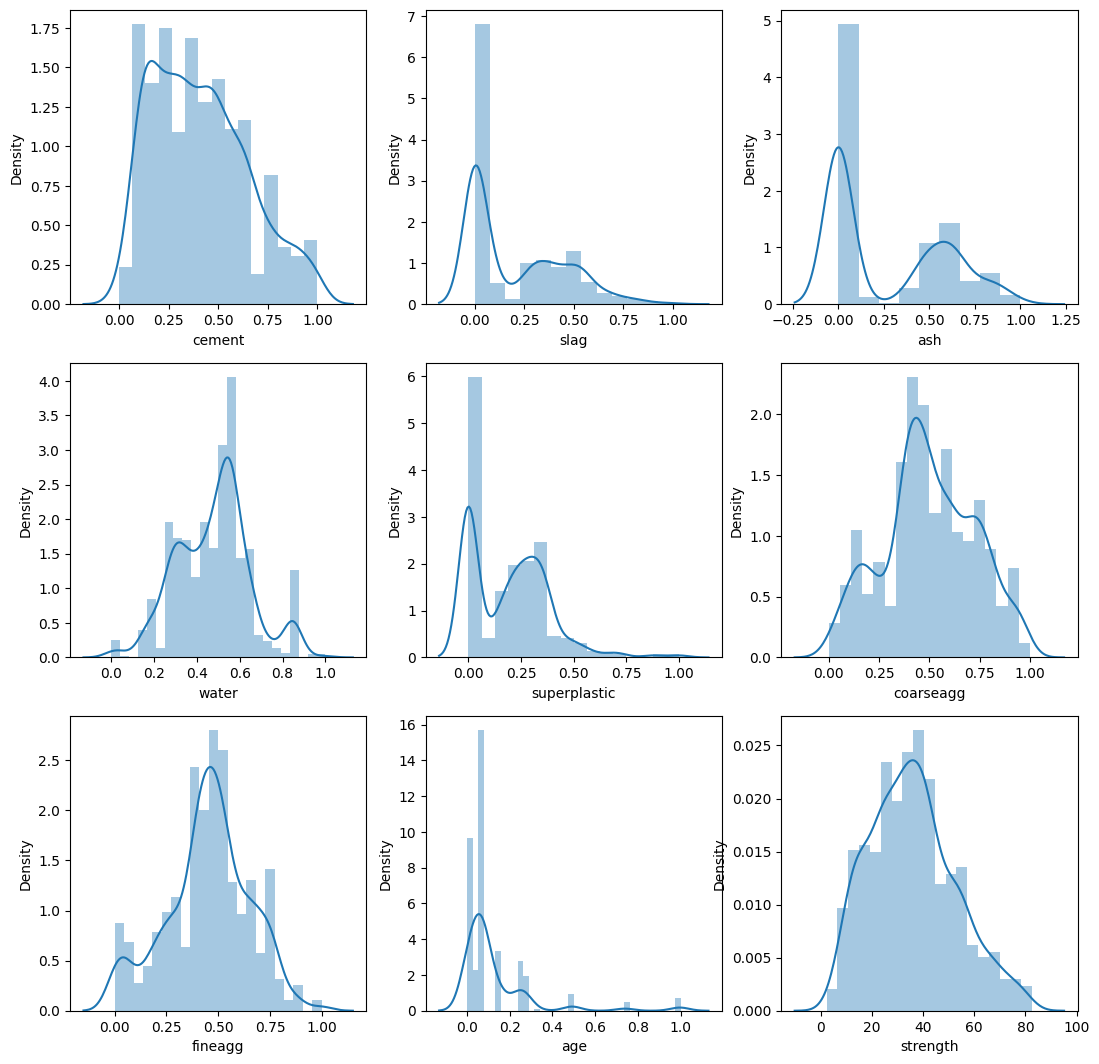

In [17]:

X = data.drop('strength', axis=1).values  # Características
Y = data['strength'].values  # Clase


scaler=MinMaxScaler( feature_range=(0,1) ) # Crear un objeto MinMaxScaler
rescaledX=scaler.fit_transform(X) # Normalizar los datos

columns = ['cement', "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age"]
dataX=pd.DataFrame(rescaledX, columns=columns[0:8]) # Crear un DataFrame con los datos normalizados
dataX['strength'] = Y  

f, axes = plt.subplots(3, 3, figsize=(13, 13) , sharex=False, sharey=False) #se creará un gráfico de 3x3
sns.distplot(dataX['cement'], ax=axes[0, 0])
sns.distplot(dataX['slag'], ax=axes[0, 1])
sns.distplot(dataX['ash'], ax=axes[0, 2])
sns.distplot(dataX['water'], ax=axes[1, 0])
sns.distplot(dataX['superplastic'], ax=axes[1, 1])
sns.distplot(dataX['coarseagg'], ax=axes[1, 2])
sns.distplot(dataX['fineagg'], ax=axes[2, 0])
sns.distplot(dataX['age'], ax=axes[2, 1])
sns.distplot(dataX['strength'], ax=axes[2, 2])

plt.show()


dataX.to_csv("concrete_clean.csv", index=False)
